<a href="https://colab.research.google.com/github/danielroa98/Redes-Neuronales/blob/main/A01021960_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 #OpenCV

import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical

# Import the dataset that will be used
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

### Loading data from the Cifar10 dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape)
print(test_images.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


(32, 32, 3)
[3]


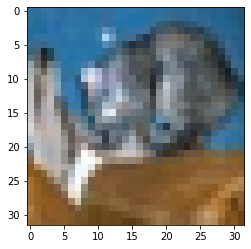

In [3]:
sample = 0
print(test_images[sample].shape)
print(test_labels[sample])

sampleImg = cv2.cvtColor(test_images[sample], cv2.COLOR_BGR2RGB)

plt.imshow(sampleImg, cmap='gray')
# plt.imshow(test_images[0], cmap='gray')

In [4]:
train_imgs_standard = train_images.reshape((50000, 32*32*3))
train_imgs_standard = train_imgs_standard.astype('float32')/255

test_imgs_standard = test_images.reshape((10000, 32*32*3))
test_imgs_standard = test_imgs_standard.astype('float32')/255

In [5]:
print(train_labels)
print(train_labels.shape)

train_labels_standard = to_categorical(train_labels)
test_labels_standard = to_categorical(test_labels)

print(train_labels_standard[0])
print(train_labels_standard.shape)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(50000, 10)


In [27]:
network = models.Sequential()

# Hidden layers
network.add(layers.Dense(32, activation='relu', input_shape=(3072,), name='Hidden_0'))
network.add(layers.Dense(64, activation='relu', name='Hidden_1'))
network.add(layers.Dense(128, activation='relu', name='Hidden_2'))
network.add(layers.Dense(256, activation='relu', name='Hidden_3'))
network.add(layers.Dense(512, activation='relu', name='Hidden_4'))
network.add(layers.Dense(1024, activation='relu', name='Hidden_5'))

# Output layer
network.add(layers.Dense(10, activation='softmax', name='Output'))

network.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_0 (Dense)             (None, 32)                98336     
_________________________________________________________________
Hidden_1 (Dense)             (None, 64)                2112      
_________________________________________________________________
Hidden_2 (Dense)             (None, 128)               8320      
_________________________________________________________________
Hidden_3 (Dense)             (None, 256)               33024     
_________________________________________________________________
Hidden_4 (Dense)             (None, 512)               131584    
_________________________________________________________________
Hidden_5 (Dense)             (None, 1024)              525312    
_________________________________________________________________
Output (Dense)               (None, 10)               

In [28]:
x_train = train_imgs_standard[:35000]
x_val = train_imgs_standard[35000:]

y_train = train_labels_standard[:35000]
y_val = train_labels_standard[35000:]

history = network.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val))

Epoch 1/25
1094/1094 [==============================] - 6s 5ms/step - loss: 1.9131 - accuracy: 0.3006 - val_loss: 1.8049 - val_accuracy: 0.3490
Epoch 2/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.7340 - accuracy: 0.3751 - val_loss: 1.6955 - val_accuracy: 0.3847
Epoch 3/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.6566 - accuracy: 0.3987 - val_loss: 1.6443 - val_accuracy: 0.4063
Epoch 4/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.5999 - accuracy: 0.4243 - val_loss: 1.6251 - val_accuracy: 0.4141
Epoch 5/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.5665 - accuracy: 0.4356 - val_loss: 1.6029 - val_accuracy: 0.4269
Epoch 6/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.5301 - accuracy: 0.4482 - val_loss: 1.5963 - val_accuracy: 0.4296
Epoch 7/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.5045 - accuracy: 0.4574 - val_loss: 1.5770 - val_accuracy:

In [29]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

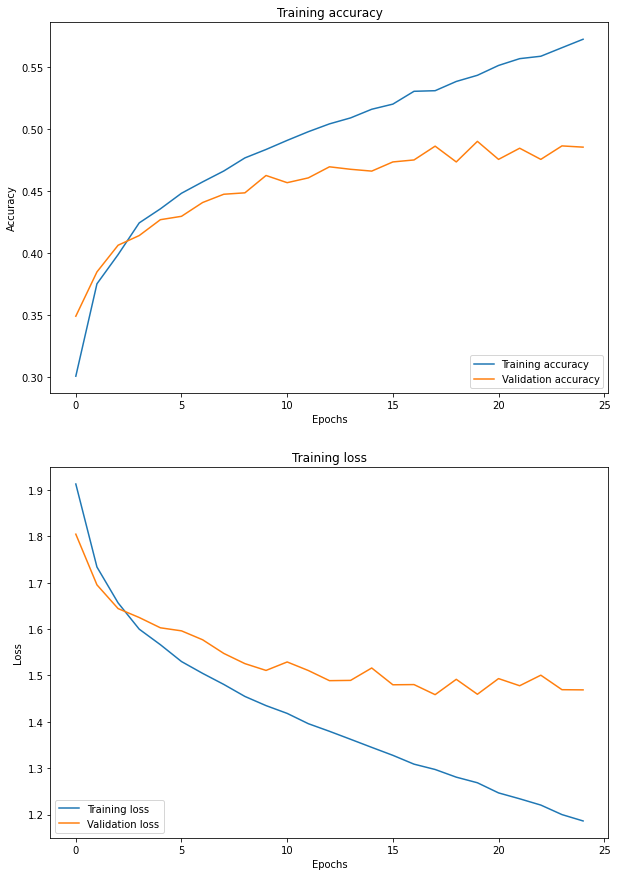

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')

In [31]:
test_results = network.evaluate(test_imgs_standard, test_labels_standard)
print(test_results)

313/313 [==============================] - 1s 2ms/step - loss: 1.4487 - accuracy: 0.4927
[1.4487173557281494, 0.4927000105381012]
